In [1]:
from os import listdir
import re
import statistics
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def parse_memsamples(filename):
    fh = open(filename)
    data = fh.readlines()
    fh.close()
    newdata = [d for d in data if not d[0].isalpha()]
    newdata = [d.strip() for d in newdata]
    newdata = ''.join(newdata)
    newdata = newdata.split(',')
    newdata = [int(d) for d in newdata]
    return newdata

def parse_avg(filename):
    fh = open(filename)
    data = fh.readlines()
    fh.close()
    for i in range(len(data)-1,-1,-1):
        if 'avg' in data[i]: return data[i].strip()
    return None

def parse_stdev(filename):
    fh = open(filename)
    data = fh.readlines()
    fh.close()
    for i in range(len(data)-1,-1,-1):
        if 'stdev' in data[i]: return data[i].strip()
    return None

def parse_lifetime(filename):
    fh = open(filename)
    data = fh.read()
    fh.close()
    for d in data[len(data)-1:0:-1]:
        if 'lifetime' in d: return d.strip()
    return None

def get_all_lifetimes(filenames):
        return [ re.sub('lifetime: ','',parse_liefetime(f)) for f in filenames ]

def plotit(data, label):
    y = data
    x = range(1,len(data)+1)
    plt.plot(x,y,label=label)

def average_list(data_files):
    alldata     = [ parse_memsamples(df) for df in data_files ]
    length      = min([len(data) for data in alldata])
    alldata     = [ data[:length] for data in alldata ]
    average = [ statistics.mean([data[i] for data in alldata]) for i in range(length) ]
    return average


In [3]:
data_folder = './data1'
data_files = [ data_folder+'/'+file for file in listdir(data_folder)]
data_files_array = [ df for df in data_files if 'Array' in df ]
data_files_object = [ df for df in data_files if 'Object' in df]

In [4]:
averages = [ parse_avg(df) for df in data_files_array ]
averages = [ re.sub('[a-zA-Z: ]','',a) for a in averages ]
averages = [ float(a) for a in averages ]
array_total_average = statistics.mean(averages)
print(array_total_average)

4376304.3377967235


In [5]:
averages = [ parse_avg(df) for df in data_files_object ]
averages = [ re.sub('[a-zA-Z: ]','',a) for a in averages ]
averages = [ float(a) for a in averages ]
object_total_average = statistics.mean(averages)
print(object_total_average)

4534139.722509421


In [6]:
array_avglist = average_list(data_files_array)
object_avglist = average_list(data_files_object)

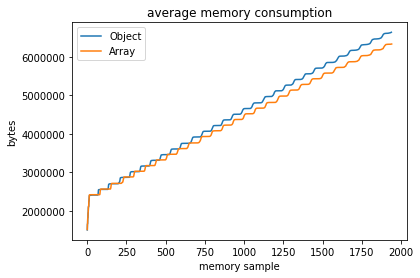

In [7]:
plotit(object_avglist,'Object')
plotit(array_avglist,'Array')
plt.xlabel('memory sample')
plt.ylabel('bytes')
plt.title('average memory consumption')
plt.legend(loc='upper left')
plt.show()

In [ ]:
## this cell gets out the average lifetimes


In [8]:
array_lastread = array_avglist[-1]
object_lastread = object_avglist[-1]
print("arr:",array_lastread,"bytes total")
print("obj:",object_lastread,"bytes total")
print("diff:",object_lastread - array_lastread,"bytes")
print(len(array_avglist),len(object_avglist))

arr: 6329681.273631841 bytes total
obj: 6634936.358208955 bytes total
diff: 305255.0845771143 bytes
1939 1937


In [14]:
d = {
    'array total average': array_total_average,
    'object total average': object_total_average,
    'array final value': array_lastread,
    'object final value': object_lastread,
    'object greater by': object_lastread-array_lastread,
    'average lifetime of memory collection': -1
}
pd.DataFrame(d.values(),d.keys())

,0
array total average,4.376304e+06
object total average,4.534140e+06
array final value,6.329681e+06
object final value,6.634936e+06
object greater by,3.052551e+05
average lifetime of memory collection,-1.000000e+00
